In [20]:
import cv2 
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import cv2 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras import layers



In [21]:
words_file_path = "dataset/words_new.txt"
dataset_path = 'dataset/iam_words/words'

In [22]:
dataset_path

'dataset/iam_words/words'

In [23]:
with open(words_file_path) as f:
    lines = f.readlines()

In [24]:
data_desc = lines[18:]

In [25]:
data_desc

['a01-000u-00-00 ok 154 408 768 27 51 AT A\n',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE\n',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to\n',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop\n',
 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.\n',
 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell\n',
 'a01-000u-00-06 ok 154 1896 757 173 72 IN from\n',
 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating\n',
 'a01-000u-01-01 ok 156 901 958 147 79 DTI any\n',
 'a01-000u-01-02 ok 156 1112 958 208 42 AP more\n',
 'a01-000u-01-03 ok 156 1400 937 294 59 NN Labour\n',
 'a01-000u-01-04 ok 156 1779 932 174 63 NN life\n',
 'a01-000u-01-05 ok 156 2008 933 237 70 NNS Peers\n',
 'a01-000u-02-00 ok 157 408 1106 65 70 BEZ is\n',
 'a01-000u-02-01 ok 157 541 1118 72 54 TO to\n',
 'a01-000u-02-02 ok 157 720 1114 113 63 BE be\n',
 'a01-000u-02-03 ok 157 916 1136 281 46 VBN made\n',
 'a01-000u-02-04 ok 157 1281 1117 80 59 IN at\n',
 'a01-000u-02-05 ok 157 1405 1140 64 35 AT a\n',
 'a01-000u-02-06 ok

In [26]:

image_filepaths =[]
image_texts = []



for label in data_desc:
    data_raw = label.split()
    file_name = data_raw[0]
    status = data_raw[1]
    word = data_raw[-1]

    
    if status == 'ok':
        image_texts.append(word)
        word_path = file_name.split('-')
        image_filepaths.append(dataset_path+'/'+word_path[0]+'/'+word_path[0]+'-'+word_path[1] +'/'+ file_name+'.png')
        
        



In [27]:
image_filepath = image_filepaths
image_text = image_texts



In [28]:
#  Checking for corrupt images - Image read error
corrupt_images =[]
for img in image_filepaths:
    try:
        img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY)
    except:
        corrupt_images.append(img)

In [29]:
print(len(image_filepaths))
print(len(corrupt_images))
# No files were corrupt

38305
1


In [30]:
for path in corrupt_images:
    corrupt_index = image_filepaths.index(path)
    del image_filepath[corrupt_index]
    del image_texts[corrupt_index]

In [31]:
print(len(image_filepaths))
print(len(corrupt_images))
# No files were corrupt

38304
1


In [32]:
### get vocabulary for the current dataset
vocab = set("".join(map(str, image_texts)))
print(sorted(vocab))

['!', '"', '#', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [33]:
max_label_len = max([len(str(text)) for text in image_texts])
max_label_len

19

In [34]:
char_list = sorted(vocab)

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
    
    return pad_sequences([dig_lst], maxlen=max_label_len, padding='post', value=len(char_list))[0]


In [35]:
encoded_image_texts = list(map(encode_to_labels , image_texts))
image_texts

['A',
 'MOVE',
 'to',
 'stop',
 'Mr.',
 'Gaitskell',
 'from',
 'nominating',
 'any',
 'more',
 'Labour',
 'life',
 'Peers',
 'is',
 'to',
 'be',
 'made',
 'at',
 'a',
 'meeting',
 'of',
 'Labour',
 'put',
 'down',
 'a',
 'resolution',
 'on',
 'the',
 'subject',
 'Griffiths',
 ',',
 'P',
 'for',
 'Manchester',
 'Exchange',
 '.',
 'A',
 'MOVE',
 'to',
 'stop',
 'Mr.',
 'Gaitskell',
 'from',
 'nominating',
 'any',
 'more',
 'Labour',
 'life',
 'Peers',
 'is',
 'to',
 'be',
 'made',
 'at',
 'a',
 'meeting',
 'of',
 'Labour',
 'Ps',
 'tomorrow',
 '.',
 'Mr.',
 'Michael',
 'Foot',
 'has',
 'put',
 'down',
 'a',
 'resolution',
 'on',
 'the',
 'subject',
 'and',
 'he',
 'is',
 'to',
 'be',
 'backed',
 'by',
 'Mr.',
 'Will',
 'Griffiths',
 ',',
 'P',
 'for',
 'Manchester',
 'Exchange',
 '.',
 'Though',
 'they',
 'may',
 'gather',
 'some',
 'Left-wing',
 'support',
 ',',
 'a',
 'large',
 'majority',
 'of',
 'Labour',
 'Ps',
 'are',
 'likely',
 'to',
 'turn',
 'down',
 'the',
 'Foot-Griffiths',
 

In [36]:
encoded_image_texts

[array([24, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([36, 38, 45, 28, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([69, 64, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([68, 69, 64, 65, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([36, 67,  9, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([30, 50, 58, 69, 68, 60, 54, 61, 61, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([55, 67, 64, 62, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([63, 64, 62, 58, 63, 50, 69, 58, 63, 56, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([50, 63, 74, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([62, 64, 67, 54, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
        76, 76]),
 array([35, 50, 51, 64, 70, 67, 76, 76, 76, 76, 76, 76, 76, 

In [37]:
X_train_paths = image_filepaths[:int(len(image_filepaths) * 0.90)]
y_train_texts = encoded_image_texts[:int(len(image_texts) * 0.90)]

X_test_paths = image_filepaths[int(len(image_filepaths) * 0.90) : ]
y_test_texts =encoded_image_texts[int(len(image_texts) * 0.90) : ]




In [38]:
def process_single_sample(img_path, label):

    # 1. Read image
    img = tf.io.read_file(img_path)
    # print(img)
    

    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # tf.reduce_max(img)
    # print(tf.reduce_min(img))
    # plt.imshow(img)

    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    # 4. Resize to the desired size
    img = tf.image.resize(img, [32, 128])
    
#     img = tf.transpose(img, perm=[1, 0, 2])
    return {"image": img, "label": label}

In [39]:
process_single_sample(X_train_paths[0],y_train_texts[0])

{'image': <tf.Tensor: shape=(32, 128, 1), dtype=float32, numpy=
 array([[[0.97763485],
         [0.97763485],
         [0.977603  ],
         ...,
         [0.9843138 ],
         [0.9843138 ],
         [0.9843138 ]],
 
        [[0.962929  ],
         [0.962929  ],
         [0.96253526],
         ...,
         [0.9843138 ],
         [0.9843138 ],
         [0.9843138 ]],
 
        [[0.9623162 ],
         [0.9623162 ],
         [0.961569  ],
         ...,
         [0.9843138 ],
         [0.9843138 ],
         [0.9843138 ]],
 
        ...,
 
        [[0.40287992],
         [0.40287992],
         [0.40999734],
         ...,
         [0.56240046],
         [0.57113975],
         [0.57113975]],
 
        [[0.49050248],
         [0.49050248],
         [0.4989385 ],
         ...,
         [0.9133033 ],
         [0.91715693],
         [0.91715693]],
 
        [[0.6147672 ],
         [0.6147672 ],
         [0.6224643 ],
         ...,
         [0.9471283 ],
         [0.9478555 ],
         [0.94785

In [40]:
batch_size = 20

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_paths, y_train_texts))

train_dataset = (
    train_dataset.map(
        process_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((X_test_paths, y_test_texts))
validation_dataset = (
    validation_dataset.map(
        process_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

In [41]:
train_dataset

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 32, 128, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, 19), dtype=tf.int32, name=None)}>

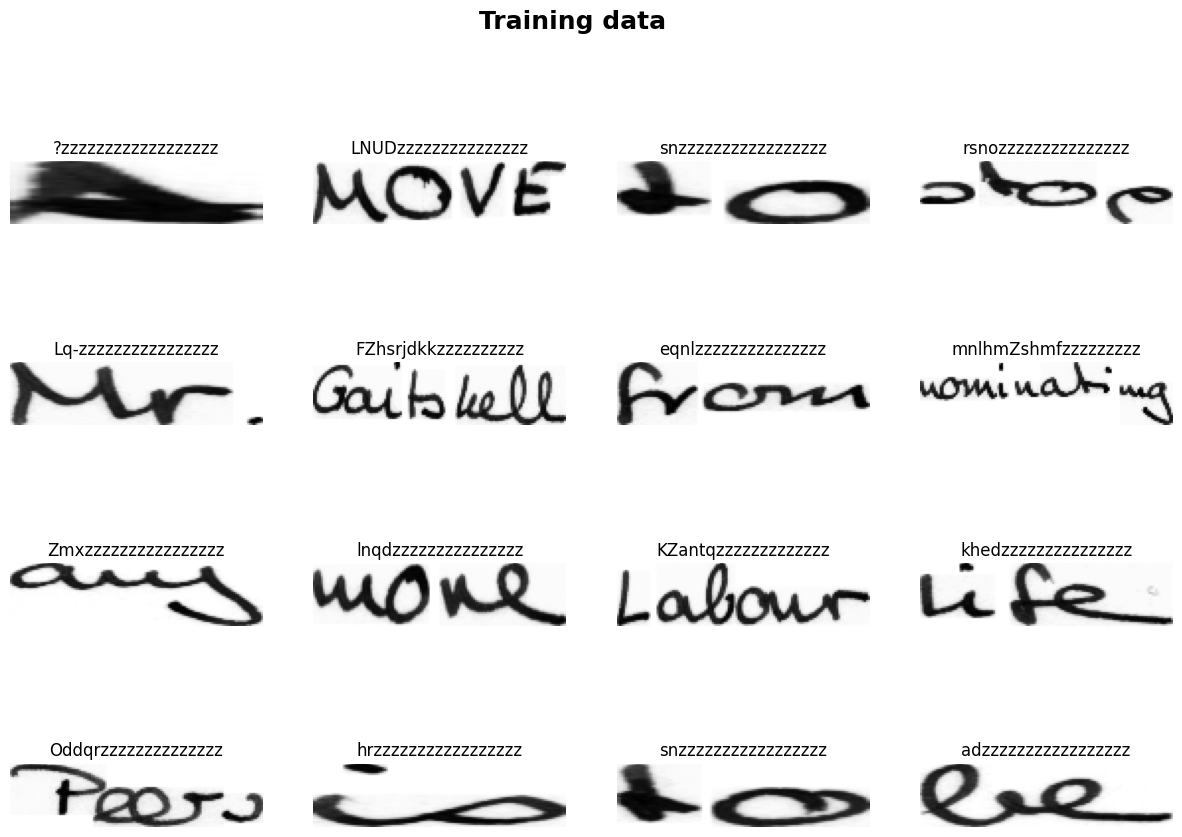

In [50]:
# Mapping characters to integers
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_list, num_oov_indices=-0, mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

train_data_fig, ax = plt.subplots(4, 4, figsize=(15, 10))
train_data_fig.suptitle('Training data', weight='bold', size=18)


for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]

    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")

        label = label.replace('[UNK]', '')
        ax[i // 4, i % 4].imshow(img[:, :, 0], cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
    
plt.show()